# Analyse Std Dev Markit France|

In [49]:
# import des libs
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
from os import *
from os.path import *
import xlwings as xw
from xlwings import Range 

In [50]:
os.chdir(r'C:\Users\rmolli\Desktop\Power-Europe\Data')
data = pd.read_csv(r"Data Mark-It Raw 07.csv")

data = data[['ns1:ValuationDate','ns1:Currency',
       'ns1:Underlying', 'ns1:Underlying1', 'ns1:Underlying2', 
       'ns1:ClientPrice', 'ns1:CompositePrice', 'ns1:ConsensusPrice',
       'ns1:EndDate',
       'ns1:KurtosisPrice', 'ns1:NumberAcceptedPrice',
       'ns1:Period','ns1:RangePrice', 'ns1:SkewnessPrice',
       'ns1:StandardDeviationPrice', 'ns1:StartDate']]


C:\Users\rmolli\AppData\Local\Temp\ipykernel_67440\665143095.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"Data Mark-It Raw 07.csv")


## France Base Load Analysis

In [51]:
short_term = ['2022-05-31 00:00:00', '2022-06-30 00:00:00',
       '2022-07-31 00:00:00', '2022-08-31 00:00:00',
       '2022-09-30 00:00:00', '2022-10-31 00:00:00',
       '2022-11-30 00:00:00', '2022-12-31 00:00:00',
     ]

long_term = ['2023-01-31 00:00:00', '2023-02-28 00:00:00',
       '2023-03-31 00:00:00', '2023-04-30 00:00:00',
       '2023-05-31 00:00:00', '2023-06-30 00:00:00',
       '2023-07-31 00:00:00', '2023-08-31 00:00:00',
       '2023-09-30 00:00:00', '2023-10-31 00:00:00',
       '2023-11-30 00:00:00', '2023-12-31 00:00:00',
       '2024-01-31 00:00:00', '2024-02-29 00:00:00',
       '2024-03-31 00:00:00', '2024-04-30 00:00:00',
       '2024-05-31 00:00:00', '2024-06-30 00:00:00',
       '2024-07-31 00:00:00', '2024-08-31 00:00:00',
       '2024-09-30 00:00:00', '2024-10-31 00:00:00',
       '2024-11-30 00:00:00', '2024-12-31 00:00:00',
       '2025-01-31 00:00:00', '2025-02-28 00:00:00',
       '2025-03-31 00:00:00', '2025-04-30 00:00:00',
       '2025-05-31 00:00:00', '2025-06-30 00:00:00',
       '2025-07-31 00:00:00', '2025-08-31 00:00:00',
       '2025-09-30 00:00:00', '2025-10-31 00:00:00',
       '2025-11-30 00:00:00', '2025-12-31 00:00:00',
       '2026-01-31 00:00:00', '2026-02-28 00:00:00',
       '2026-03-31 00:00:00', '2026-04-30 00:00:00',
       '2026-05-31 00:00:00', '2026-06-30 00:00:00',
       '2031-07-31 00:00:00', '2031-08-31 00:00:00',
       '2031-09-30 00:00:00', '2031-10-31 00:00:00',
       '2031-11-30 00:00:00', '2031-12-31 00:00:00',
       '2032-01-31 00:00:00', '2032-02-29 00:00:00',
       '2032-03-31 00:00:00', '2032-04-30 00:00:00']

### Calcul Divers

In [52]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'] == '2023-01-31 00:00:00' ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

19.83120648
12.95784108
15.78


In [53]:
data_ger_BL= data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate'].isin(short_term) ) ,:]
print(data_ger_BL["ns1:StandardDeviationPrice"].max())
print(data_ger_BL["ns1:StandardDeviationPrice"].min())
print(round(data_ger_BL["ns1:StandardDeviationPrice"].mean(),2))

18.9088279
0.51860666
6.99


### Analyse Quarters

In [54]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Fra_quarters.dropna(inplace = True, axis='columns' )
recap_Fra_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,
Min,0.78,2.94,1.13,1.28,0.88,11.27,5.79,5.33,1.03,2.64,1.54,1.93,0.39,8.07,2.25,3.58,4.29
Average,8.37,10.24,3.89,4.35,4.98,15.32,7.54,6.7,4.15,9.19,5.47,6.18,4.65,11.36,4.77,5.47,7.68
Max,17.67,20.15,8.17,8.77,10.52,22.18,9.73,8.27,9.27,16.37,11.93,12.31,12.69,20.14,6.45,6.75,11.42
Nb of Prices,15.25,13.65,13.05,11.8,12.77,10.65,10.55,10.47,11.28,9.03,8.95,7.83,8.52,5.95,5.9,5.47,5.95


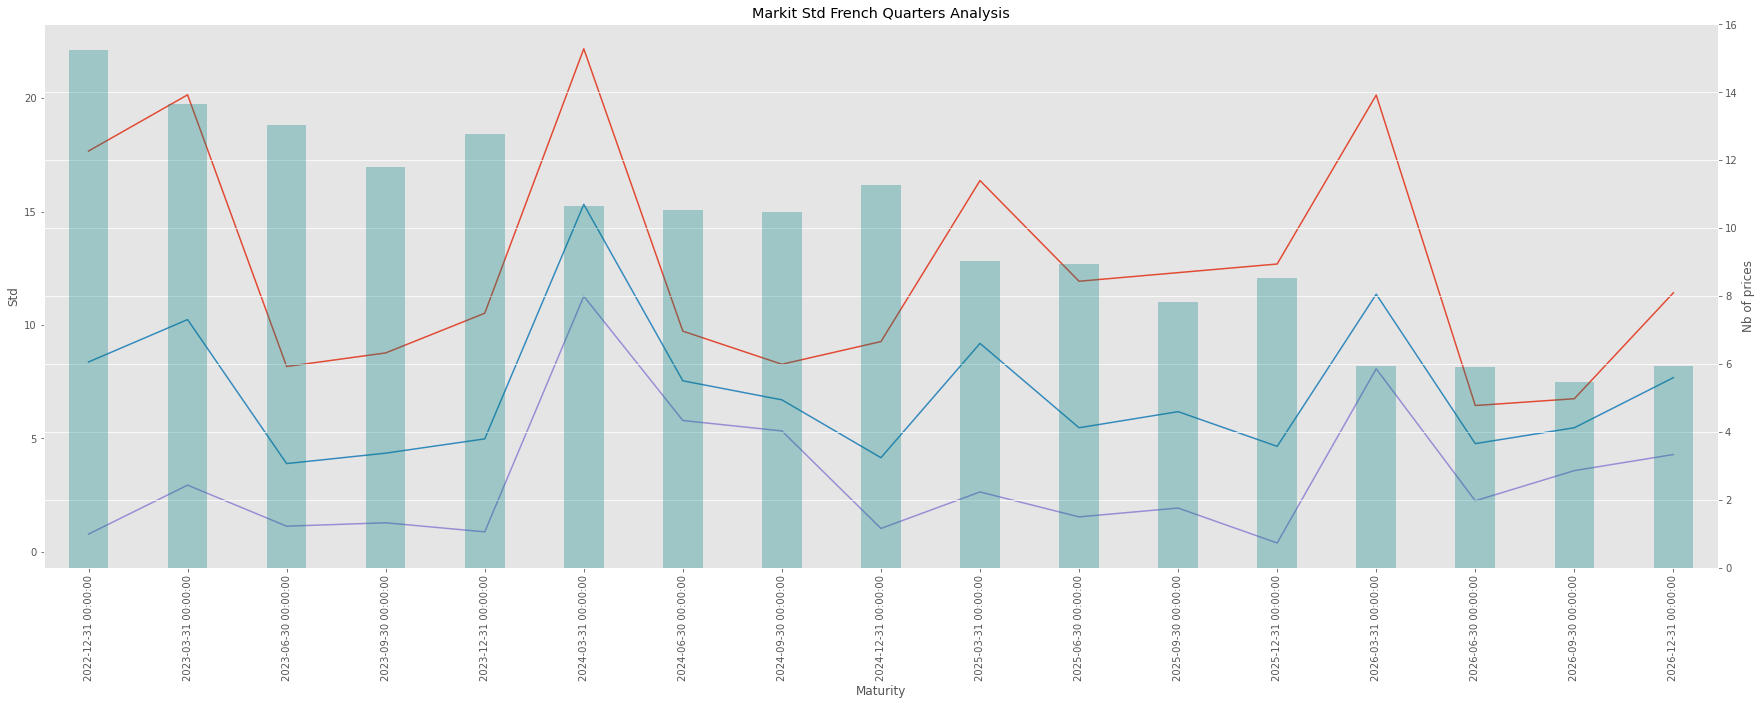

In [55]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std French Quarters Analysis")

recap_Fra_quarters.loc['Max'].plot()
recap_Fra_quarters.loc['Average'].plot()
ax1= recap_Fra_quarters.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Fra_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [56]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

3.24
12.52
7.08


### Analyse Months

In [57]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

      
recap_Fra_months.dropna(inplace = True, axis='columns' )
recap_Fra_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-30 00:00:00,2023-10-31 00:00:00,2023-11-30 00:00:00,2023-12-31 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,
Min,0.52,1.32,2.52,8.19,0.78,12.96,11.34,2.94,3.66,3.11,1.13,1.31,2.42,1.28,7.89,3.57,0.88
Average,2.24,3.19,7.75,14.4,8.37,15.78,14.5,10.24,7.97,5.98,3.89,3.3,3.92,4.35,9.83,6.46,4.98
Max,5.96,6.7,14.76,18.91,17.67,19.83,19.88,20.15,12.88,8.61,8.17,5.2,5.42,8.77,14.38,9.28,10.52
Nb of Prices,13.75,15.68,13.9,13.85,15.25,13.05,12.9,13.65,12.75,12.75,13.05,12.1,11.2,11.8,11.15,11.1,12.77


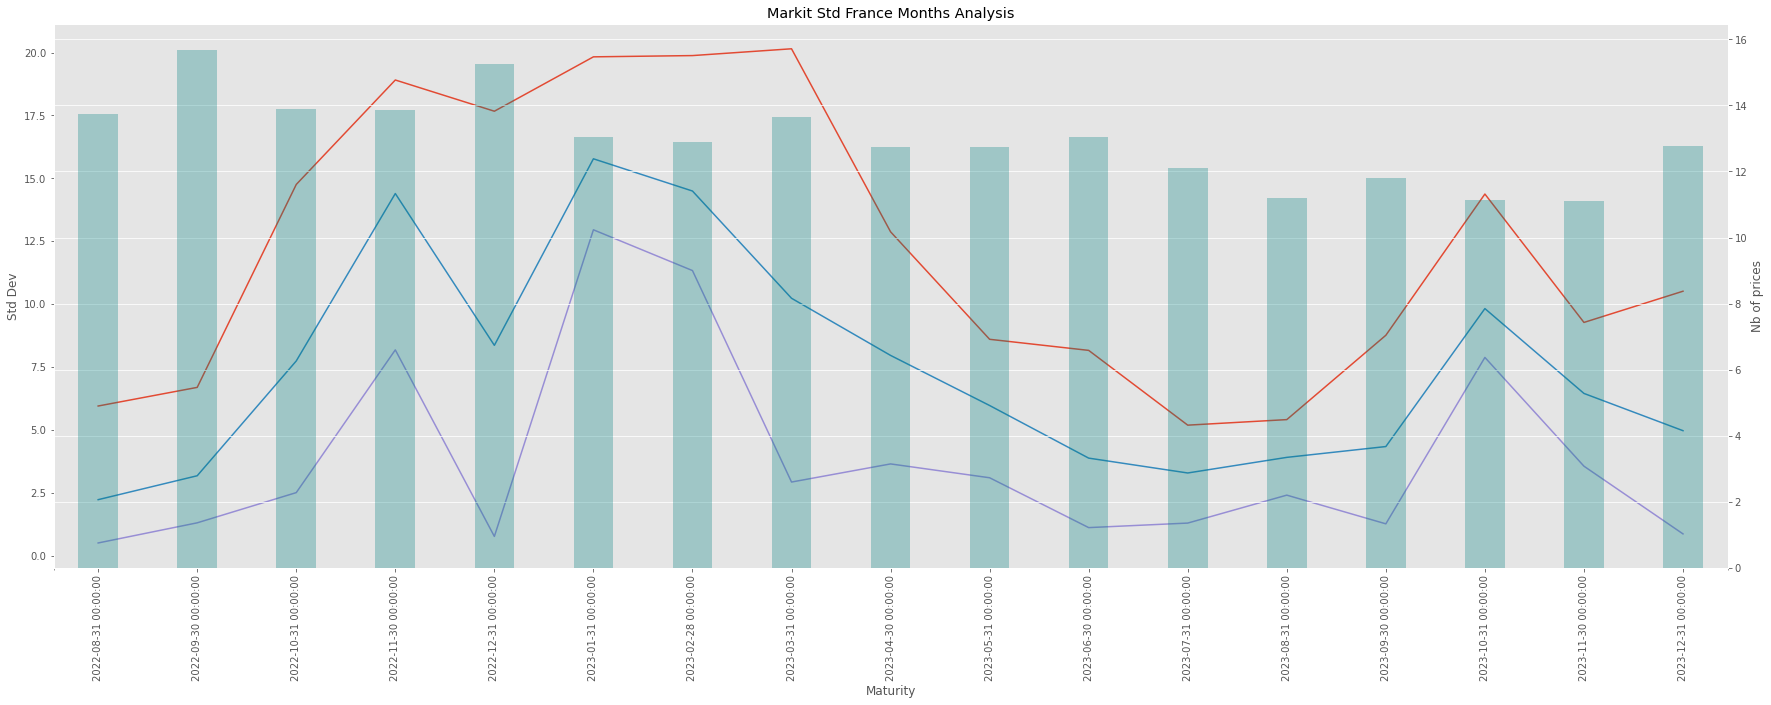

In [58]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std France Months Analysis")

recap_Fra_months.loc['Max'].plot()
recap_Fra_months.loc['Average'].plot()
ax1= recap_Fra_months.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4,7,10]))

In [59]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

3.87
12.18
7.48


### Analyse Years

In [60]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'
recap_Fra_years

,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00,2027-12-31 00:00:00,2028-12-31 00:00:00,2029-12-31 00:00:00,2030-12-31 00:00:00,2031-12-31 00:00:00
Statistics | Maturity,,,,,,,,,
Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nb of Prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - BASELOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,0.88,1.03,0.39,4.29
Average,4.98,4.15,4.65,7.68
Max,10.52,9.27,12.69,11.42
Nb of Prices,12.77,11.28,8.52,5.95


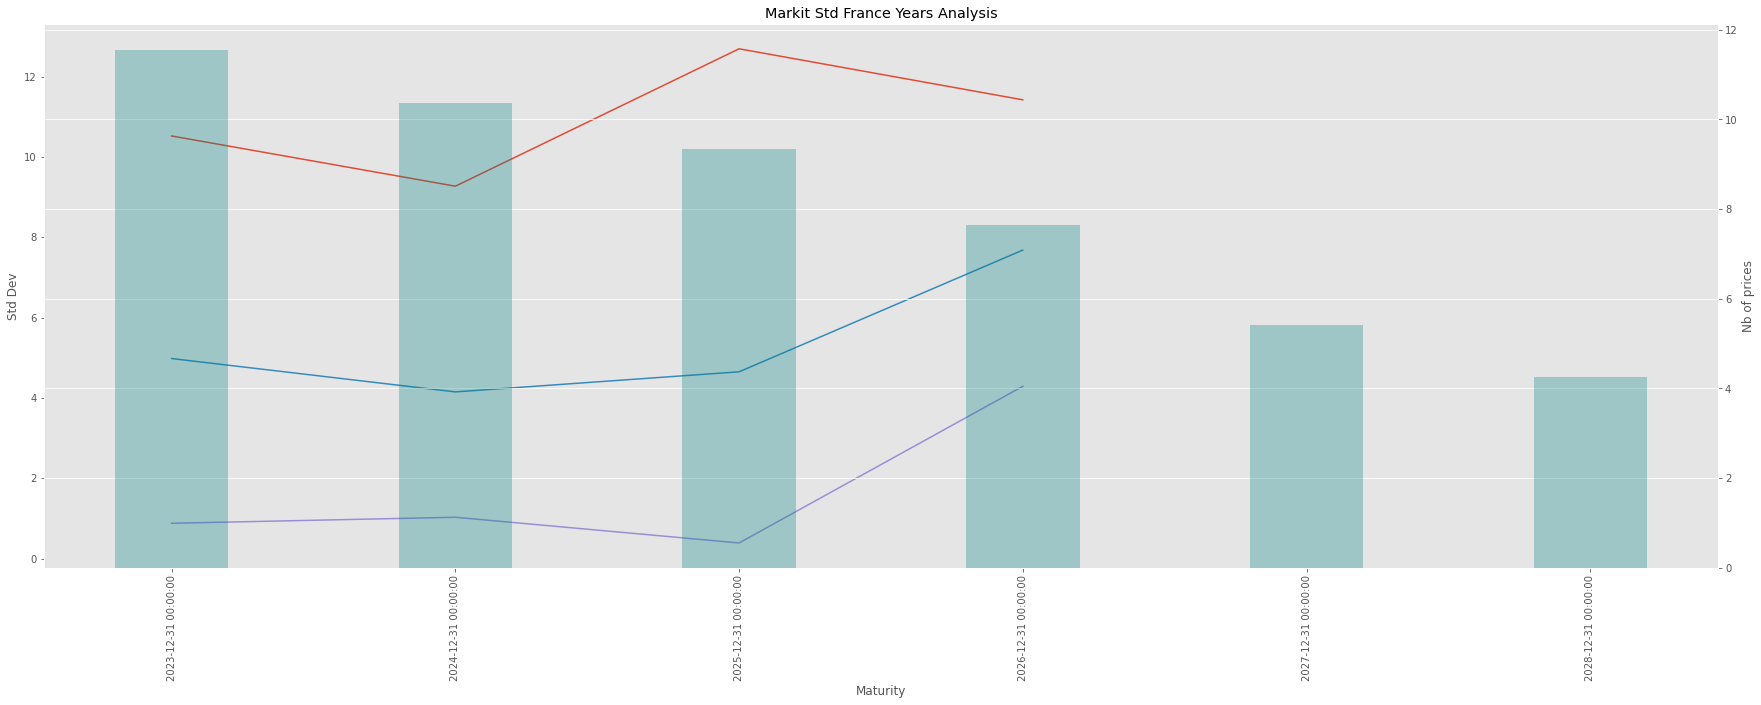

In [62]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std France Years Analysis")

recap_Fra_years.loc['Max'].plot()
recap_Fra_years.loc['Average'].plot()
ax1= recap_Fra_years.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Ger_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [63]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

1.65
10.98
5.36


## France Peaks Analysis

### Analyse Quarters

In [75]:
quarters = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Quarter' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_quarters = pd.DataFrame(columns = quarters, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_quarters.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_quarters.shape[1]):
        recap_Fra_quarters.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_quarters.shape[1]):
      recap_Fra_quarters.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_quarters.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)


recap_Fra_quarters.dropna(inplace = True, axis='columns' )
recap_Fra_quarters

,2022-12-31 00:00:00,2023-03-31 00:00:00,2023-06-30 00:00:00,2023-09-30 00:00:00,2023-12-31 00:00:00,2024-03-31 00:00:00,2024-06-30 00:00:00,2024-09-30 00:00:00,2024-12-31 00:00:00,2025-03-31 00:00:00,2025-06-30 00:00:00,2025-09-30 00:00:00,2025-12-31 00:00:00,2026-03-31 00:00:00,2026-06-30 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,
Min,11.94,12.72,6.64,12.81,4.38,27.51,15.16,18.27,4.35,10.77,5.66,8.11,1.35,10.28,6.99,8.5,6.21,16.77,10.41
Average,36.46,36.77,14.56,21.44,23.49,49.87,23.67,28.0,14.67,23.94,13.08,15.41,9.74,17.97,9.01,8.5,12.56,16.77,10.41
Max,84.12,67.27,30.99,35.56,48.74,87.5,35.39,38.55,28.92,40.89,19.15,20.84,32.85,26.4,10.31,8.5,16.39,16.77,10.41
Nb of Prices,13.65,11.35,11.12,10.97,11.9,10.65,10.6,10.43,11.02,8.78,8.7,7.17,8.03,5.8,5.67,4.3,4.67,4.19,4.24


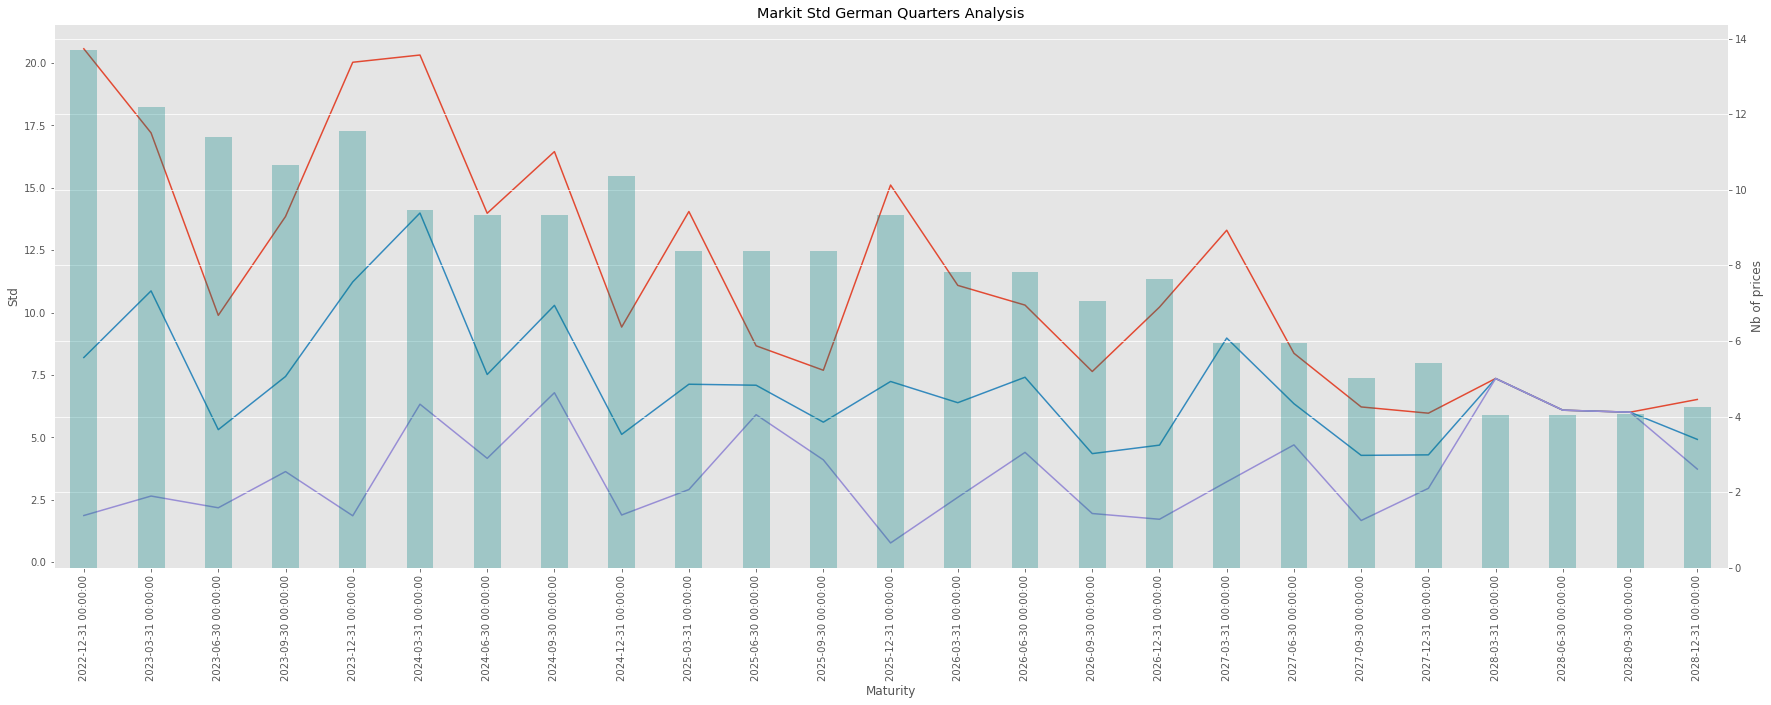

In [66]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std France Quarters Analysis")

recap_Fra_quarters.loc['Max'].plot()
recap_Fra_quarters.loc['Average'].plot()
ax1= recap_Fra_quarters.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std")

ax2 = recap_Fra_quarters.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [76]:
print(round(recap_Fra_quarters.loc["Min", :].mean(),2))
print(round(recap_Fra_quarters.loc["Max", :].mean(),2))
print(round(recap_Fra_quarters.loc["Average", :].mean(),2))

10.46
34.71
20.33


### Analyse Months

In [77]:
months = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Month' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_months = pd.DataFrame(columns = months, index = ['Min', 'Average', 'Max', 'Nb of Prices' ] )
recap_Fra_months.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_months.shape[1]):
        recap_Fra_months.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_months.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_months.dropna(inplace = True, axis='columns' )
recap_Fra_months

,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,...,2026-02-28 00:00:00,2026-03-31 00:00:00,2026-04-30 00:00:00,2026-05-31 00:00:00,2026-06-30 00:00:00,2026-07-31 00:00:00,2026-09-30 00:00:00,2026-12-31 00:00:00,2027-03-31 00:00:00,2027-06-30 00:00:00
Statistics | Maturity,,,,,,,,,,,,,,,,,,,,,
Min,6.08,8.21,30.12,47.92,11.94,36.09,24.4,12.72,11.23,14.24,...,15.75,10.28,3.11,7.54,6.99,6.01,8.5,6.21,16.77,10.41
Average,11.17,12.72,40.0,73.11,36.46,52.42,45.73,36.77,16.25,18.75,...,17.18,17.97,6.53,8.23,9.01,6.83,8.5,12.56,16.77,10.41
Max,16.94,22.9,51.4,105.68,84.12,74.08,68.61,67.27,27.03,26.13,...,19.0,26.4,8.69,9.48,10.31,7.65,8.5,16.39,16.77,10.41
Nb of Prices,11.65,14.12,12.5,12.3,13.65,11.1,11.05,11.35,10.45,10.4,...,5.35,5.8,5.25,5.25,5.67,5.15,4.3,4.67,4.19,4.24


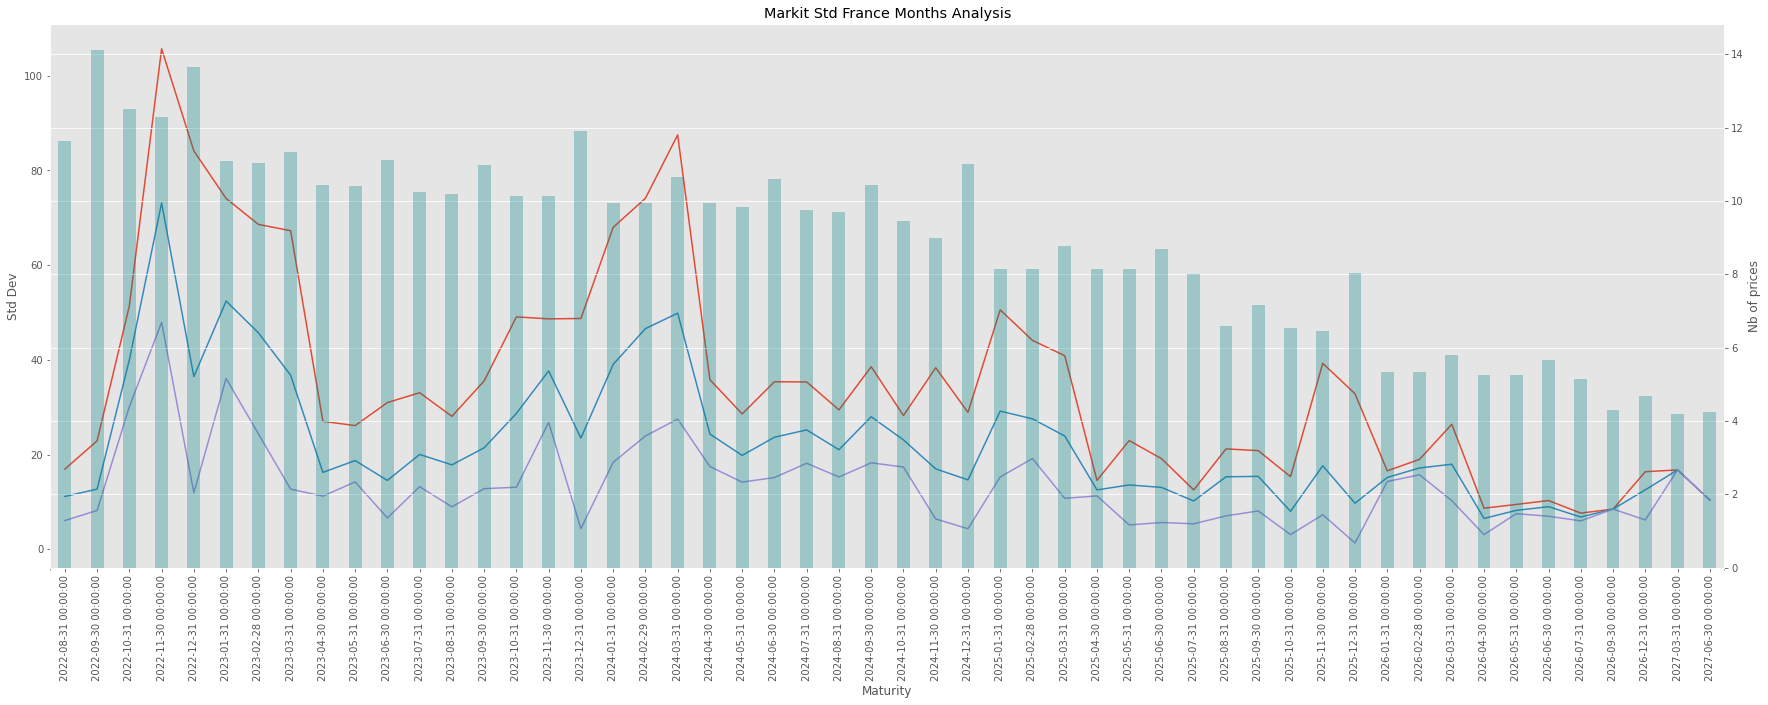

In [78]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std France Months Analysis")

recap_Fra_months.loc['Max'].plot()
recap_Fra_months.loc['Average'].plot()
ax1= recap_Fra_months.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_months.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonth=[4,7,10]))

In [80]:
print(round(recap_Fra_months.loc["Min", :].mean(),2))
print(round(recap_Fra_months.loc["Max", :].mean(),2))
print(round(recap_Fra_months.loc["Average", :].mean(),2))

13.29
35.21
22.4


### Analyse Years

In [81]:
years = data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:Period'] == 'Year' ) ,["ns1:EndDate"]]["ns1:EndDate"].unique()
recap_Fra_years = pd.DataFrame(columns = years, index = ['Min', 'Average', 'Max', 'Nb of Prices'] )
recap_Fra_years.index.name = 'Statistics | Maturity'

for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[0,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].min(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[1,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].mean(),2)
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[2,j] = round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:StandardDeviationPrice"].max(),2) 
for j in np.arange(0,recap_Fra_years.shape[1]):
        recap_Fra_years.iloc[3,j] =  round(data.loc[(data['ns1:Underlying'] == 'FRENCH POWER - PEAKLOAD') & (data['ns1:EndDate']== recap_Fra_years.columns[j]) ,:]["ns1:NumberAcceptedPrice"].mean(),2)

recap_Fra_years.dropna(inplace = True, axis='columns' )
recap_Fra_years


,2023-12-31 00:00:00,2024-12-31 00:00:00,2025-12-31 00:00:00,2026-12-31 00:00:00
Statistics | Maturity,,,,
Min,4.38,4.35,1.35,6.21
Average,23.49,14.67,9.74,12.56
Max,48.74,28.92,32.85,16.39
Nb of Prices,11.9,11.02,8.03,4.67


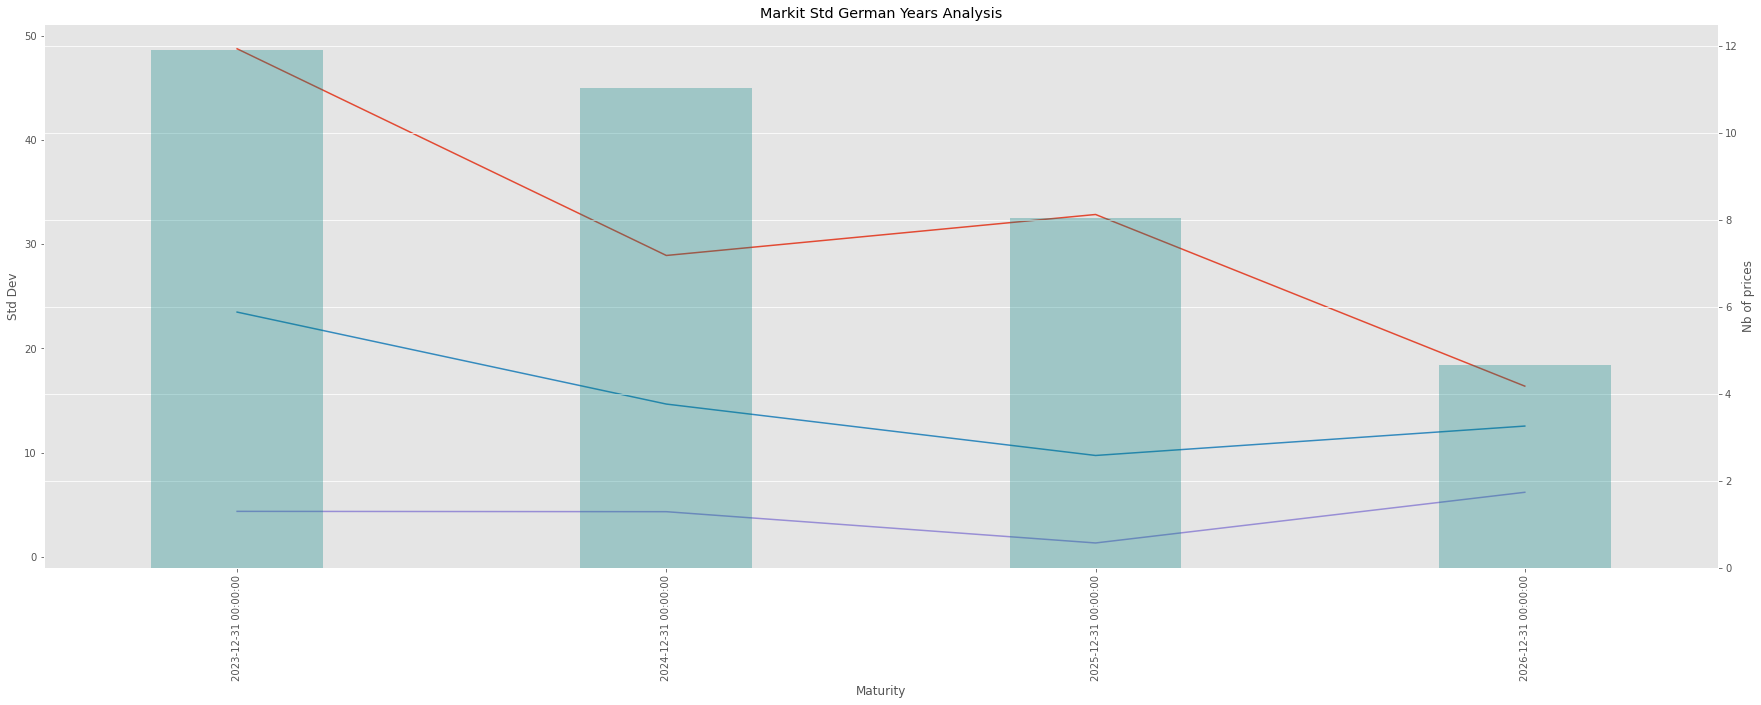

In [82]:
plt.figure(figsize=(30, 10))
plt.title("Markit Std German Years Analysis")

recap_Fra_years.loc['Max'].plot()
recap_Fra_years.loc['Average'].plot()
ax1= recap_Fra_years.loc['Min'].plot()

ax1.set_xlabel("Maturity")
ax1.set_ylabel("Std Dev")

ax2 = recap_Fra_years.loc['Nb of Prices'].plot(kind = 'bar',secondary_y = True, color = 'teal', width = 0.4, alpha = 0.3)
ax2.set_ylabel("Nb of prices");

In [83]:
print(round(recap_Fra_years.loc["Min", :].mean(),2))
print(round(recap_Fra_years.loc["Max", :].mean(),2))
print(round(recap_Fra_years.loc["Average", :].mean(),2))

4.07
31.72
15.12
